In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Loading the dataset
data = pd.read_csv('kc_house_data.csv')
data = data.drop(['date','id'], axis=1)
print(data.head())  


      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront   
0  221900.0         3       1.00         1180      5650     1.0           0  \
1  538000.0         3       2.25         2570      7242     2.0           0   
2  180000.0         2       1.00          770     10000     1.0           0   
3  604000.0         4       3.00         1960      5000     1.0           0   
4  510000.0         3       2.00         1680      8080     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated   
0     0          3      7        1180              0      1955             0  \
1     0          3      7        2170            400      1951          1991   
2     0          3      6         770              0      1933             0   
3     0          5      7        1050            910      1965             0   
4     0          3      8        1680              0      1987             0   

   zipcode      lat     long  sqft_living15 

In [3]:

# Spliting the data into features (X) and target (y)
X = data.drop('price', axis=1)
y = data['price']

# Spliting the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#Making predictions on the test set
y_pred = model.predict(X_test)

#Calculating Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

#Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

#R-squared (R2) to measure the goodness of fit
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Squared Error: ",mse)
print("Root Mean Squared Error:",rmse)
print("R-squared (R2):",r2)



Mean Squared Error:  45173046132.79195
Root Mean Squared Error: 212539.51663818178
R-squared (R2): 0.7011904448878294


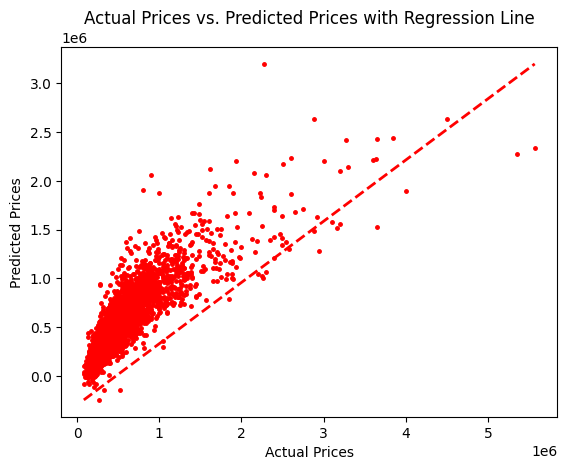

In [4]:
# Visualizing the model's predictions
plt.scatter(y_test, y_pred, color='red', marker='.', s=25, label='Data Points')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linestyle='--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs. Predicted Prices with Regression Line")
plt.show()

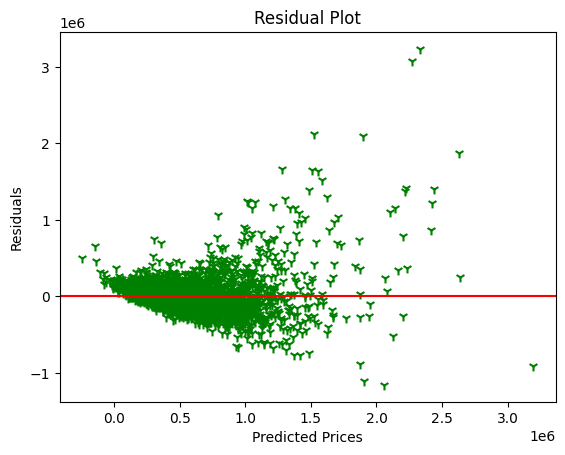

In [5]:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals ,marker='1',s=50,color='green')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.title("Residual Plot")
plt.show()


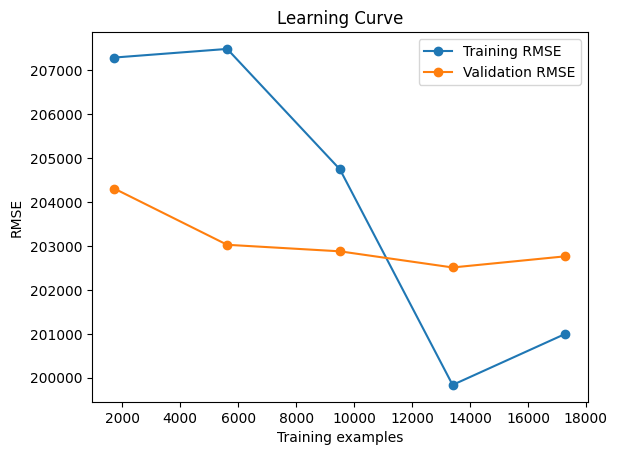

In [6]:
from sklearn.model_selection import learning_curve

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y, cv=5, scoring='neg_mean_squared_error')
train_rmse = np.sqrt(-train_scores.mean(axis=1))
test_rmse = np.sqrt(-test_scores.mean(axis=1))

plt.figure()
plt.plot(train_sizes, train_rmse, 'o-', label="Training RMSE")
plt.plot(train_sizes, test_rmse, 'o-', label="Validation RMSE")
plt.xlabel("Training examples")
plt.ylabel("RMSE")
plt.legend()
plt.title("Learning Curve")
plt.show()


In [1]:
data

NameError: name 'data' is not defined

In [7]:
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
# Assuming you have a new set of data in a DataFrame called 'new_data'
new_data = pd.DataFrame({
    'bedrooms': [3],
    'bathrooms': [2],
    'sqft_living': [1500],
    'sqft_lot': [5000],
    'floors': [2],
    'waterfront': [0],
    'view': [1],
    'condition': [3],
    'grade': [7],
    'sqft_above': [1200],
    'sqft_basement': [300],
    'yr_built': [2000],
    'yr_renovated': [0],
    'zipcode': [98001],
    'lat': [47.3],
    'long': [-122.2],
    'sqft_living15': [1600],
    'sqft_lot15': [4800]
})

# Make predictions using the trained model
new_predictions = model.predict(new_data)

# Print the predictions
print("Predicted Prices for New Data:")
print(new_predictions)


Predicted Prices for New Data:
[210051.11053142]
